# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine nearest city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats = np.random.uniform(low=lat_range[0],high=lat_range[1],size=1500)
lngs = np.random.uniform(low=lng_range[0],high=lng_range[1],size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

617


['cururupu',
 'ruatoria',
 'georgetown',
 'sena madureira',
 'atuona',
 'catamarca',
 'aden',
 'hermanus',
 'leningradskiy',
 'new norfolk',
 'issia',
 'mataura',
 'rikitea',
 'cidreira',
 'busselton',
 'qaanaaq',
 'cape town',
 'dikson',
 'lukovetskiy',
 'baykit',
 'san patricio',
 'pathein',
 'mollendo',
 'kamenskoye',
 'bluff',
 'avanigadda',
 'tasiilaq',
 'tiksi',
 'kapaa',
 'kaitangata',
 'nizhneyansk',
 'fort frances',
 'comodoro rivadavia',
 'cherskiy',
 'yellowknife',
 'bac lieu',
 'taltal',
 'hobyo',
 'katsuura',
 'barrow',
 'mahebourg',
 'cabo san lucas',
 'khatanga',
 'jamestown',
 'saldanha',
 'luderitz',
 'hobart',
 'marzuq',
 'zonguldak',
 'ushuaia',
 'constitucion',
 'karpogory',
 'miranorte',
 'vaini',
 'akyab',
 'thilogne',
 'torbay',
 'rocha',
 'tautira',
 'attawapiskat',
 'acapulco',
 'poum',
 'lebu',
 'albany',
 'cedar city',
 'kahului',
 'melchor de mencos',
 'lavrentiya',
 'nikolskoye',
 'punta arenas',
 'holalkere',
 'porto belo',
 'vestmannaeyjar',
 'north bend'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Let's start with initializing some lists so that we can combine all output into a dataframe later
found_cities = []
country = []
cloudiness = []
date = []
humidity = []
max_temp = []
wind_speed = []
lat = []
lng = []

base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
#units = "imperial"
for city in cities:
    query_url = f'{base_url}{city}&appid={weather_api_key}&units=imperial'
    response = requests.get(query_url).json()
    #pprint(response)
    
    try:
        #Append my data for each city to later combine into a dataset
        found_cities.append(response['name'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        city_id = response['id']
        #Print a processing text response
        print(f'City found: {city}, City ID: {city_id}')
    
    except:
        print(f'Sorry, the city {city} was not found in the OpenWeather API')

City found: cururupu, City ID: 3401148
Sorry, the city ruatoria was not found in the OpenWeather API
City found: georgetown, City ID: 1735106
City found: sena madureira, City ID: 3662155
City found: atuona, City ID: 4020109
City found: catamarca, City ID: 3837702
City found: aden, City ID: 415189
City found: hermanus, City ID: 3366880
City found: leningradskiy, City ID: 2123814
City found: new norfolk, City ID: 2155415
City found: issia, City ID: 2287790
City found: mataura, City ID: 6201424
City found: rikitea, City ID: 4030556
City found: cidreira, City ID: 3466165
City found: busselton, City ID: 2075265
City found: qaanaaq, City ID: 3831208
City found: cape town, City ID: 3369157
City found: dikson, City ID: 1507390
City found: lukovetskiy, City ID: 533418
City found: baykit, City ID: 1510689
City found: san patricio, City ID: 3985168
City found: pathein, City ID: 1328421
City found: mollendo, City ID: 3934707
Sorry, the city kamenskoye was not found in the OpenWeather API
City foun

City found: bambous virieux, City ID: 1106677
City found: butaritari, City ID: 2110227
City found: krapivinskiy, City ID: 1502192
City found: omsukchan, City ID: 2122493
City found: tarauaca, City ID: 3661980
Sorry, the city belushya guba was not found in the OpenWeather API
City found: peniche, City ID: 2264923
City found: canico, City ID: 2270258
City found: port hardy, City ID: 6111862
City found: jalu, City ID: 86049
City found: talnakh, City ID: 1490256
City found: hervey bay, City ID: 2146219
City found: klyuchi, City ID: 1503153
City found: daokou, City ID: 1813775
City found: sarangani, City ID: 1687186
City found: yagodnoye, City ID: 2119626
City found: kodiak, City ID: 5866583
City found: klaksvik, City ID: 2618795
City found: poplar bluff, City ID: 4404233
City found: southbridge, City ID: 4951594
City found: florestopolis, City ID: 3463246
City found: luanda, City ID: 2240449
City found: svetlogorsk, City ID: 10722858
City found: mount isa, City ID: 2065594
City found: belm

City found: vestnes, City ID: 3345453
City found: yulara, City ID: 6355222
City found: ler, City ID: 371466
Sorry, the city sentyabrskiy was not found in the OpenWeather API
City found: makat, City ID: 608872
City found: ignatovka, City ID: 557531
City found: thessalon, City ID: 6164831
City found: bandiagara, City ID: 2460489
City found: sabang, City ID: 1214026
City found: kodinsk, City ID: 1503037
City found: chicama, City ID: 3698359
City found: sao joao da barra, City ID: 3448903
City found: beneditinos, City ID: 3405796
City found: cascais, City ID: 2269594
City found: kloulklubed, City ID: 7671223
City found: rundu, City ID: 3353383
City found: codrington, City ID: 2171099
City found: havoysund, City ID: 779622
Sorry, the city grand centre was not found in the OpenWeather API
City found: qasigiannguit, City ID: 3420768
City found: ilulissat, City ID: 3423146
City found: esqueda, City ID: 4006532
City found: el jicaro, City ID: 3596940
City found: lucea, City ID: 3489657
City fou

City found: mecca, City ID: 104515
City found: mazagao, City ID: 3395042
City found: gravelbourg, City ID: 5965462
City found: mabaruma, City ID: 3377301
City found: cedral, City ID: 4014914
Sorry, the city abiy adi was not found in the OpenWeather API
City found: hopelchen, City ID: 3527065
Sorry, the city katha was not found in the OpenWeather API
Sorry, the city burica was not found in the OpenWeather API
Sorry, the city makung was not found in the OpenWeather API
City found: fort-shevchenko, City ID: 609906
City found: aykhal, City ID: 2027296
Sorry, the city kadykchan was not found in the OpenWeather API
City found: pangnirtung, City ID: 6096551
City found: tanabe, City ID: 1850708
City found: tiznit, City ID: 2527087
City found: montrose, City ID: 5431716


In [6]:
# country = []
# cloudiness = []
# date = []
# humidity = []
# max_temp = []
# wind_speed = []
# lat = []
# lng = []

# base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
# #city = 'busselton'
# city = cities[0]
# query_url = f'{base_url}{city}&appid={weather_api_key}&units=imperial'
# response = requests.get(query_url).json()
# pprint(response)

# country.append(response['sys']['country'])
# cloudiness.append(response['clouds']['all'])
# date.append(response['dt'])
# humidity.append(response['main']['humidity'])
# max_temp.append(response['main']['temp_max'])
# wind_speed.append(response['wind']['speed'])
# lat.append(response['coord']['lat'])
# lng.append(response['coord']['lon'])
# city_id = response['id']

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
f'The length of City is {len()}'

TypeError: len() takes exactly one argument (0 given)

In [ ]:
#df = pd.DataFrame([cities,country,date,lat,lng,humidity,max_temp,wind_speed])
df = pd.DataFrame({
    'City':found_cities,
    'Country':country,
    'Date':date,
    'Latitude':lat,
    'Longitude':lng,
    'Cloudiness (%)':cloudiness,
    'Humidity (%)':humidity,
    'Max Temperature (F)':max_temp,
    'Wind Speed':wind_speed
})
df = df.set_index('City')
df.head()

In [ ]:
def scatter_plot(x,y):
    plt.scatter(x=x,y=y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs. {y}')
    plt.show()
    return

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
# plt.scatter(x=df['Latitude'],y=df['Max Temperature (F)'])
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (F)')
# plt.show()

scatter_plot(x=df['Latitude'],y=df['Max Temperature (F)'])

#### Latitude vs. Humidity Plot

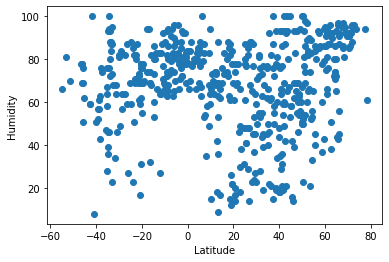

In [34]:
plt.scatter(x=df['Latitude'],y=df['Humidity (%)'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

#### Latitude vs. Cloudiness Plot

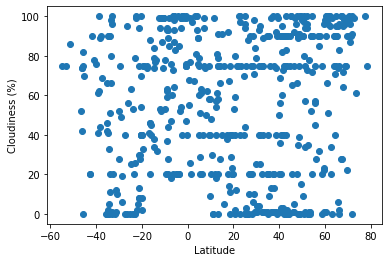

In [46]:
plt.scatter(x=df['Latitude'],y=df['Cloudiness (%)'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#### Latitude vs. Wind Speed Plot

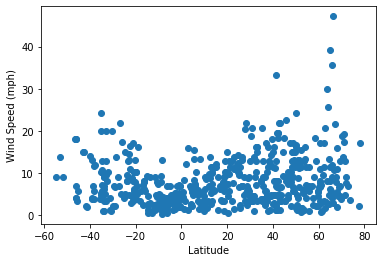

In [47]:
plt.scatter(x=df['Latitude'],y=df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [48]:
# Create Northern and Southern Hemisphere DataFrames

#Greater than or equal to 0 latitude
northern = df.loc[df['Latitude']>=0,:]
print(northern.head())
#Less than 0 latitude
southern = df.loc[df['Latitude']<0,:]
southern.head()

                      Country        Date  Latitude  Longitude  \
City                                                             
Los Llanos de Aridane      ES  1586826780     28.66     -17.92   
Fukuechō                   JP  1586826781     32.69     128.84   
Hamilton                   US  1586826701     39.18     -84.53   
Linxia Chengguanzhen       CN  1586826782     35.60     103.21   
Saint Paul Harbor          US  1586826783     57.79    -152.41   

                       Cloudiness (%)  Humidity (%)  Max Temperature (F)  \
City                                                                       
Los Llanos de Aridane               6            77                60.80   
Fukuechō                           20            55                60.80   
Hamilton                           90            60                44.01   
Linxia Chengguanzhen                9            22                49.75   
Saint Paul Harbor                  90            86                41.00   

    

,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temperature (F),Wind Speed
City,,,,,,,,
Busselton,AU,1586826780,-33.65,115.33,80,88,62.01,1.01
Kavieng,PG,1586826780,-2.57,150.80,100,72,84.51,5.21
Port Alfred,ZA,1586826781,-33.59,26.89,66,84,59.00,5.01
Port Elizabeth,ZA,1586826727,-33.92,25.57,51,72,59.00,6.93
Ushuaia,AR,1586826782,-54.80,-68.30,75,66,48.20,9.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

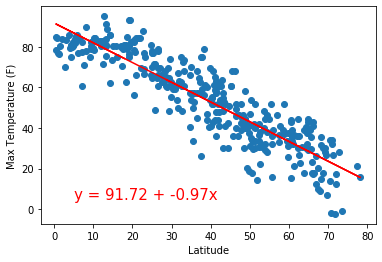

The r-squared of the regression is 0.81


In [55]:
x_values = northern['Latitude']
y_values = northern['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

print(f'The r-squared of the regression is {round(rvalue**2,2)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

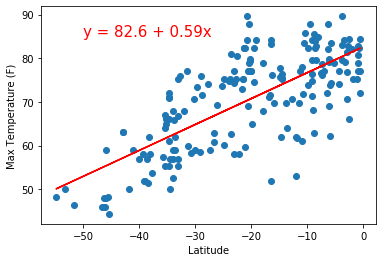

The r-squared of the regression is 0.53


In [61]:
x_values = southern['Latitude']
y_values = southern['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

print(f'The r-squared of the regression is {round(rvalue**2,2)}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

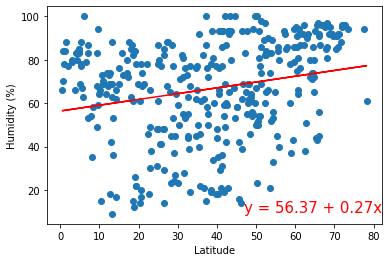

The r-squared of the regression is 0.05


In [60]:
x_values = northern['Latitude']
y_values = northern['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(47,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print(f'The r-squared of the regression is {round(rvalue**2,2)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

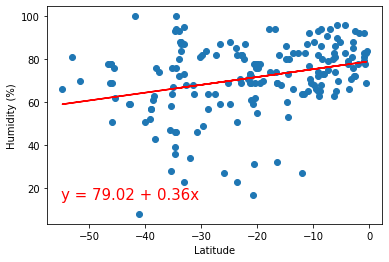

The r-squared of the regression is 0.09


In [67]:
x_values = southern['Latitude']
y_values = southern['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print(f'The r-squared of the regression is {round(rvalue**2,2)}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

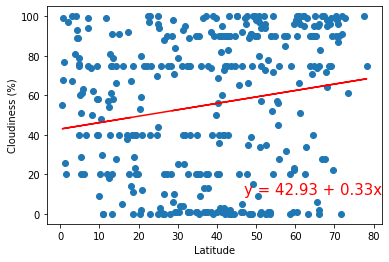

The r-squared of the regression is 0.03


In [68]:
x_values = northern['Latitude']
y_values = northern['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(47,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

print(f'The r-squared of the regression is {round(rvalue**2,2)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

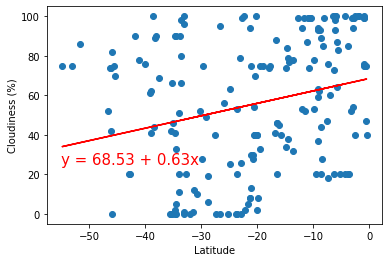

The r-squared of the regression is 0.07


In [72]:
x_values = southern['Latitude']
y_values = southern['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

print(f'The r-squared of the regression is {round(rvalue**2,2)}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

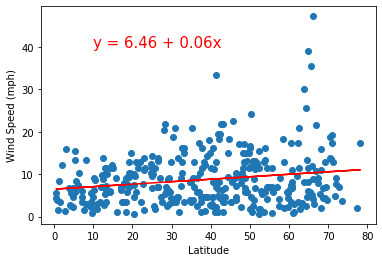

The r-squared of the regression is 0.03


In [74]:
x_values = northern['Latitude']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

print(f'The r-squared of the regression is {round(rvalue**2,2)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

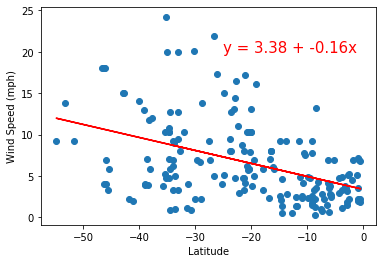

The r-squared of the regression is 0.19


In [78]:
x_values = southern['Latitude']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
predictions = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}x'
plt.scatter(x=x_values,y=y_values)
plt.plot(x_values,predictions,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

print(f'The r-squared of the regression is {round(rvalue**2,2)}')

In [8]:
df.to_csv('city_data.csv')